In [7]:
!pip install pandas

In [6]:
import pandas as pd

In [4]:
import numpy as np

In [10]:
import matplotlib.pyplot as plt

In [181]:
%matplotlib inline
import matplotlib.pyplot as plt

In [11]:
import seaborn as sns

In [12]:
import plotly.graph_objects as go

In [134]:
%matplotlib inline

In [190]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [209]:
from sqlalchemy import create_engine
import pandas as pd

In [21]:
df_donor_details = pd.read_excel(r"C:\Users\fenny\OneDrive\Desktop\OrganDonor_Consolidated.xlsx",sheet_name='DonorDetails')
df_referral_details = pd.read_excel(r"C:\Users\fenny\OneDrive\Desktop\OrganDonor_Consolidated.xlsx",sheet_name='ReferralDetails')
df_outcomes = pd.read_excel(r"C:\Users\fenny\OneDrive\Desktop\OrganDonor_Consolidated.xlsx",sheet_name='Outcomes')
df_opo_hospdetails = pd.read_excel(r"C:\Users\fenny\OneDrive\Desktop\OrganDonor_Consolidated.xlsx",sheet_name='OPO_HospDetails')
df_yearly_outcomes = pd.read_excel(r"C:\Users\fenny\OneDrive\Desktop\OrganDonor_Consolidated.xlsx",sheet_name='Yearly_Outcomes')

In [48]:
df_donor_details

,PatientID,age,gender,race,causeofdeath,mechanism_of_death,brain_death,time_asystole,time_brain_death
0,OPO1_P155959,54.0,M,White,Unknown,Unknown,0,2036-01-02 18:26:00,NaT
1,OPO1_P297347,78.0,M,Hispanic,Unknown,Unknown,0,2031-12-24 14:06:00,NaT
2,OPO1_P399316,57.0,M,Hispanic,Anoxia,Unknown,0,2034-05-11 00:00:00,NaT
3,OPO1_P246407,78.0,F,Black,cerebrovascular accident,Stroke,0,2035-06-14 14:18:00,NaT
4,OPO1_P187209,70.0,F,White,Unknown,Unknown,0,2034-02-18 18:50:00,NaT
...,...,...,...,...,...,...,...,...,...
133096,OPO6_P54946,54.0,F,Black,Anoxia,Natural Causes,0,2032-09-16 02:34:00,NaT
133097,OPO6_P630991,63.0,M,Black,cerebrovascular accident,Stroke,0,2034-06-06 22:14:00,NaT
133098,OPO6_P8748,28.0,M,White,Anoxia,Drug Intoxication,0,NaT,NaT
133099,OPO6_P5461,85.0,F,White,Anoxia,Cardiovascular,0,NaT,NaT


In [47]:
cause_of_death=df_donor_details['causeofdeath'].unique()
print(cause_of_death)

['Unknown' 'Anoxia' 'cerebrovascular accident' 'Head Trauma' 'Other'
 'CNS Tumor' 'Stroke' 'Pneumonia' 'Sepsis' 'ESLD' 'Respiratory - Other'
 'Infectious Disease - Viral' 'Cancer' 'Cardiac Arrest'
 'Multi-system failure' 'Infectious Disease - Bacterial' 'CHF'
 'Other, specify' 'thoracic aortic aneurysm' 'Pulmonary embolism' 'GSW'
 'COPD' 'Myocardial infarction' 'Overdose' 'Hepatitis'
 'Sudden infant death syndrome' 'ESRD' 'Trauma'
 'Infectious Disease - Other' 'Exsanguination' 'HIV' 'Arrhythmia'
 'Fetal Demise' 'SAH' 'Drowning' 'Prematurity' 'Thoracic aortic aneurysm'
 'TR - GSW' 'Intracranial Hemorrhage' 'cerebral vascular accident'
 'TR - other' 'RES - pneumonia' 'GI - bleed' 'Septic Shock'
 'MultiSystem Failure' 'TR - MVA' 'RES - other' 'RES - COPD'
 'Liver Disease/Failure' 'other' 'asphyixiation' 'Renal  Disease'
 'Drug Overdose' 'RES - lung disease' 'PED - other'
 'TR - CHI - Closed Head Injury' 'Pulmonary Embolism' 'Natural Causes'
 'Meningitis' 'Aneurysm' 'RES - asthma' 'GI - ne

In [23]:
df_referral_details

,PatientID,Approached Relatives,Authorized By Family,Cross_Clamped,transplanted,Tissue_Referral,Eye_Referral,time_referred,time_approached,time_authorized,time_procured,Referral_DayofWeek,Referral_Year,Procured_Year
0,OPO1_P320866,0,0,0,0,1,1,2033-06-21 06:49:25.000,NaT,NaT,NaT,Tuesday,2018,NaN
1,OPO1_P549364,0,0,0,0,1,1,2036-11-21 08:41:13.397,NaT,NaT,NaT,Sunday,2021,NaN
2,OPO1_P536997,1,0,0,0,1,1,2030-08-23 23:28:54.687,NaT,NaT,NaT,Friday,2015,NaN
3,OPO1_P463285,0,0,0,0,1,1,2034-05-12 17:34:52.277,NaT,NaT,NaT,Monday,2019,NaN
4,OPO1_P284978,0,0,0,0,1,1,2033-02-22 04:45:27.867,NaT,NaT,NaT,Friday,2018,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133096,OPO6_P384794,0,0,0,0,1,1,2034-07-10 13:26:00.000,NaT,NaT,NaT,Tuesday,2019,NaN
133097,OPO6_P902138,0,0,0,0,1,1,2035-08-04 05:13:00.000,NaT,NaT,NaT,Monday,2021,NaN
133098,OPO6_P5461,0,0,0,0,1,1,2031-03-13 20:13:00.000,NaT,NaT,NaT,Sunday,2015,NaN
133099,OPO6_P942291,0,0,0,0,1,1,2032-11-20 13:32:00.000,NaT,NaT,NaT,Tuesday,2019,NaN


In [24]:
df_outcomes

,PatientID,outcome_heart,outcome_liver,outcome_kidney_left,outcome_kidney_right,outcome_lung_left,outcome_lung_right,outcome_intestine,outcome_pancreas
0,OPO1_P648384,Transplanted,Transplanted,Transplanted,Transplanted,Transplanted,Transplanted,NaN,Recovered for Transplant but not Transplanted
1,OPO1_P635213,Transplanted,Transplanted,Transplanted,Transplanted,NaN,Transplanted,NaN,Transplanted
2,OPO1_P404478,NaN,Transplanted,Transplanted,Transplanted,Transplanted,Transplanted,NaN,NaN
3,OPO1_P340806,NaN,Transplanted,Recovered for Transplant but not Transplanted,Recovered for Transplant but not Transplanted,Transplanted,Transplanted,NaN,NaN
4,OPO1_P278912,NaN,Transplanted,Recovered for Transplant but not Transplanted,Recovered for Transplant but not Transplanted,NaN,NaN,NaN,Recovered for Research
...,...,...,...,...,...,...,...,...,...
9529,OPO6_P925470,NaN,Transplanted,Transplanted,Transplanted,NaN,NaN,NaN,Transplanted
9530,OPO6_P273753,NaN,Transplanted,Transplanted,Transplanted,NaN,NaN,NaN,NaN
9531,OPO6_P751972,NaN,NaN,Recovered for Transplant but not Transplanted,Recovered for Transplant but not Transplanted,NaN,NaN,NaN,NaN
9532,OPO6_P667026,NaN,Transplanted,Transplanted,Transplanted,Transplanted,Transplanted,NaN,Transplanted


In [25]:
df_opo_hospdetails

,OPO,PatientID,HospitalID
0,OPO1,OPO1_P320866,OPO1_H23456
1,OPO1,OPO1_P549364,OPO1_H11908
2,OPO1,OPO1_P536997,OPO1_H23111
3,OPO1,OPO1_P463285,OPO1_H26589
4,OPO1,OPO1_P284978,OPO1_H5832
...,...,...,...
133096,OPO6,OPO6_P384794,OPO6_H591
133097,OPO6,OPO6_P902138,OPO6_H2898
133098,OPO6,OPO6_P5461,OPO6_H18156
133099,OPO6,OPO6_P942291,OPO6_H6602


In [26]:
df_yearly_outcomes

,OPO,Year,mean calc deaths
0,OPO4,2015,3074.575
1,OPO4,2016,3146.335
2,OPO4,2017,3163.300
3,OPO4,2018,3079.760
4,OPO4,2019,3125.530
5,OPO4,2020,3201.240
6,OPO6,2015,1252.000
7,OPO6,2016,1263.000
8,OPO6,2017,1388.000
9,OPO6,2018,1388.000


In [54]:
race_values=df_donor_details['race'].unique()
print(race_values)

['White' 'Hispanic' 'Black' 'Other']


In [222]:
!pip install ydata-profiling


In [79]:
from ydata_profiling import ProfileReport

In [228]:
#49) Perform an EDA of hosp_details using YDATA Profiling
exploratory_da=ProfileReport(df_opo_hospdetails,title="EDA Report",explorative=True)
exploratory_da.to_file("EDA Report.html")
exploratory_da.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [38]:
# 50) In how many cases were the relatives approached for consent vs how many were authorized
#used the function len to get the number of cases 
Rel_consent_df = len(df_referral_details[df_referral_details['Approached Relatives']==1])
print(f"Count by Relatives Consent:{Rel_consent_df}")
Auth_df=len(df_referral_details[df_referral_details['Authorized By Family']==1])
print(f"Count Authorized by Family:{Auth_df}")

Count by Relatives Consent:19551
Count Authorized by Family:11989


In [33]:
#for question 50 used value_counts to see the number of cases for the category/just tried an alternate way
Rel_consent_df = df_referral_details['Approached Relatives'].value_counts()
print(Rel_consent_df)

Approached Relatives
0    113550
1     19551
Name: count, dtype: int64


In [52]:
#51 Which OPO recorded the lowest calculated deaths in any year? 
#used idxmin to find the lowest value in that column
opo_min_death=df_yearly_outcomes.loc[df_yearly_outcomes['mean calc deaths'].idxmin()]
print(opo_min_death)

OPO                    OPO3
Year                   2016
mean calc deaths    656.265
Name: 25, dtype: object


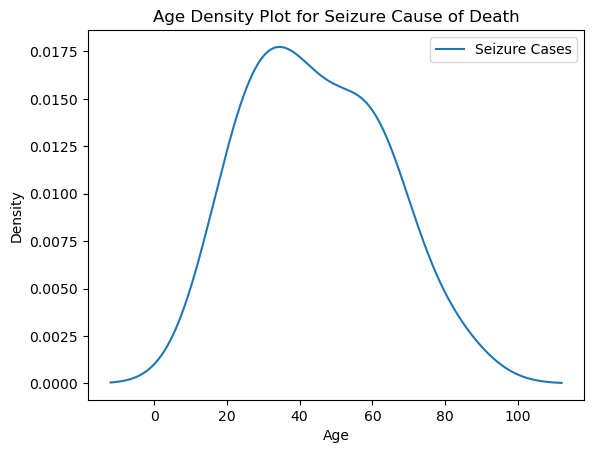

In [212]:
#52) plot the density chart for cause of death - seizure against any other variable of your choice?
df_donor_details[df_donor_details['causeofdeath']=='Seizure']['age'].plot.kde(label='Seizure Cases')
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Age Density Plot for Seizure Cause of Death')
plt.legend()
plt.show()

0.0
100.0
corr:
 causeofdeath                  AIDS  Aneurysm    Anoxia  Arrhythmia       CHF  \
causeofdeath                                                                   
AIDS                      1.000000  0.714569  0.822538    0.476731  0.597581   
Aneurysm                  0.714569  1.000000  0.982654    0.903638  0.981126   
Anoxia                    0.822538  0.982654  1.000000    0.821930  0.930036   
Arrhythmia                0.476731  0.903638  0.821930    1.000000  0.966357   
CHF                       0.597581  0.981126  0.930036    0.966357  1.000000   
...                            ...       ...       ...         ...       ...   
drowning                 -0.577350 -0.499410 -0.489134   -0.660578 -0.543835   
hanging                   0.644831 -0.072754  0.103378   -0.324179 -0.225028   
other                     0.967901  0.832189  0.920000    0.569718  0.718744   
smoke inhalation         -0.301511 -0.011340 -0.020495   -0.229984 -0.062095   
thoracic aortic aneurys

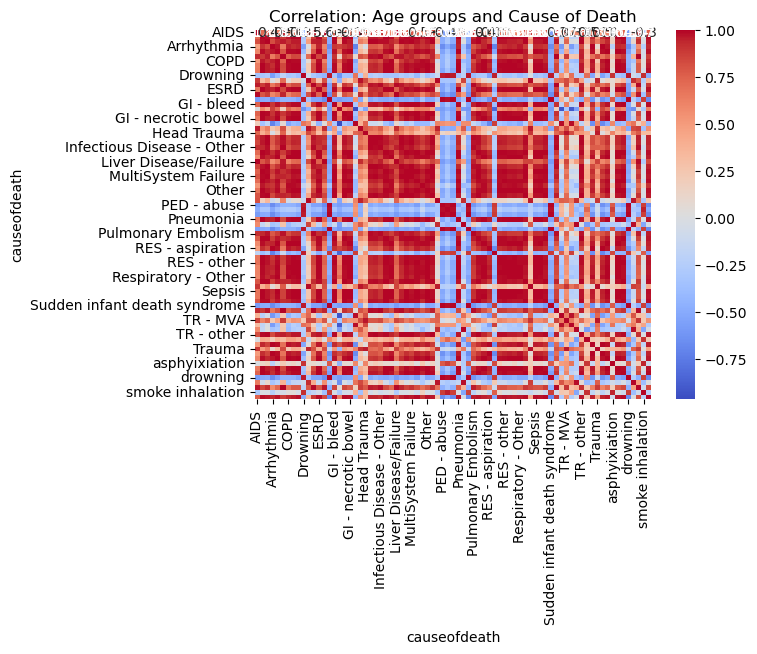

In [227]:
#53) Display a correlation matrix showing count of donors in age group vs cause of death
#find the min and max age in the age column and make bins for it
min_age=df_donor_details['age'].min()
print(min_age)
max_age=df_donor_details['age'].max()
print(max_age)
bins_age=[0,25,50,75,100]
labels_age=['Under 25','25-50','50-75','75-100']
df_donor_details['age_group']=pd.cut(df_donor_details['age'],bins=bins_age,labels=labels_age)
age_cod_count=df_donor_details.groupby(['age_group','causeofdeath'],observed=False).size().unstack().fillna(0)
corr=age_cod_count.corr()
print("corr:\n",corr)
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.title('Correlation: Age groups and Cause of Death')
plt.show(block=True)

In [214]:
#54 Connect to sql and write a query to find all donors who's cause of death is unknown 
#plpgsql connection

db_host="localhost"
db_port="5432"
db_name="OPO_DB"
db_user="postgres"
db_password="postgres"

connection_string=f"postgresql://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}"
        
engine=create_engine(connection_string)

try:
    with engine.connect() as connection:
        print("Connected to Postgresql")
except Exception as e:
    print("Connection failed:", e)
    raise

    
df_donor_details.to_sql('donor_details', engine, if_exists='replace', index=False)
df_referral_details.to_sql('referral_details', engine, if_exists='replace', index=False)
df_outcomes.to_sql('outcomes', engine, if_exists='replace', index=False)
df_opo_hospdetails.to_sql('opo_hospdetails', engine, if_exists='replace', index=False)
df_yearly_outcomes.to_sql('yearly_outcomes', engine, if_exists='replace', index=False)

print("Data loaded to postgresql")



Connected to Postgresql
Data loaded to postgresql


In [71]:
#55 Who was the youngest white donor regsitered?
Youngest1_White_donor=df_donor_details.loc[df_donor_details['race']=='White'].nsmallest(1,'age')
print(Youngest1_White_donor)

         PatientID  age gender   race causeofdeath mechanism_of_death  \
5188  OPO1_P317726  0.0      F  White      Unknown  None of the Above   

      brain_death       time_asystole time_brain_death  
5188            0 2029-04-03 20:39:00              NaT  


In [72]:
#for ques 55, the approached tried earlier had the patient with age 0 so added another filter where age>1 to see the result
Youngest2_White_donor=df_donor_details.loc[(df_donor_details['race']=='White')&(df_donor_details['age']>0)].nsmallest(1,'age')
print(Youngest2_White_donor)

         PatientID  age gender   race causeofdeath mechanism_of_death  \
1453  OPO1_P398657  1.0      M  White      Unknown            Unknown   

      brain_death       time_asystole time_brain_death  
1453            0 2034-08-18 20:15:00              NaT  


In [215]:
#56 what is the average time difference between brain death and time_approached
#merge the two dataframes 
df_mergedset=pd.merge(df_donor_details,df_referral_details,on='PatientID',how='inner')
#select the cases where brain death is 1
df_mergedset=df_mergedset[df_mergedset['brain_death']==1]
#find the difference between brain death and time_approached
df_mergedset['time_diff']=df_mergedset['time_approached']-df_mergedset['time_brain_death']
avg_time=df_mergedset['time_diff'].mean()
print({avg_time})

{Timedelta('-3 days +21:03:05.020796198')}


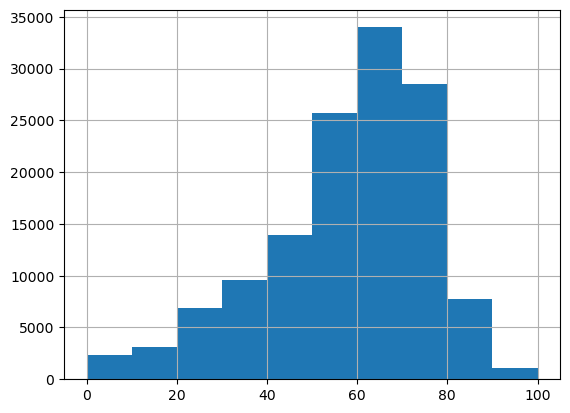

In [216]:
#57) Plot a graph to show the distrbuton of age
df_donor_details['age'].hist()
plt.show()

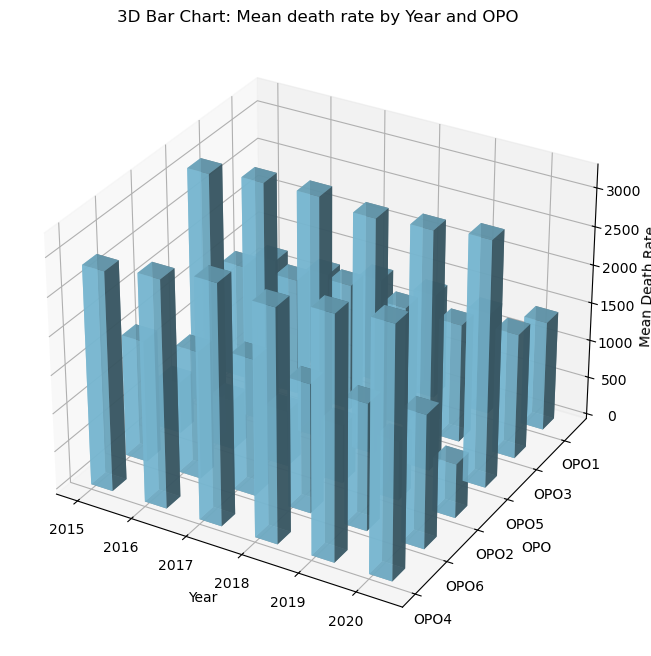

In [217]:
#58 Plot a 3-D graph using any set of random values chosen by you
#using the df_yearly_outcomes dataframe

years=df_yearly_outcomes['Year'].unique()
OPOs=df_yearly_outcomes['OPO'].unique()
mean_calc_deaths=df_yearly_outcomes.pivot(index='Year',columns='OPO',values='mean calc deaths').values

x_values=np.repeat(years, len(OPOs))
y_values=np.tile(np.arange(len(OPOs)),len(years))   #this will make it numeric
z_values=np.zeros_like(x_values)

fig=plt.figure(figsize=(12,8))
ax=fig.add_subplot(111,projection='3d')


dx=dy=0.4
dz=mean_calc_deaths.flatten()

ax.bar3d(
    x_values,
    y_values,
    z_values,
    dx, dy, dz,
    color='skyblue', alpha=0.8
)


ax.set_xlabel('Year')
ax.set_ylabel('OPO')
ax.set_zlabel('Mean Death Rate')
ax.set_title('3D Bar Chart: Mean death rate by Year and OPO')

ax.set_yticks(np.arange(len(OPOs)))
ax.set_yticklabels(OPOs)

ax.set_xticks(years)

plt.show()



In [225]:
#59) what percentage of the dataset is male vs female\n",
male_count=len(df_donor_details[df_donor_details['gender']=='M'])
male_perc=round((male_count*100/len(df_donor_details)),2)
female_count=len(df_donor_details[df_donor_details['gender']=='F'])
female_perc=round((female_count*100/len(df_donor_details)),2)
print(f"Percentage of males is {male_perc}% vs Percentage of females is {female_perc}%")
   

Percentage of males is 58.81% vs Percentage of females is 41.15%


In [184]:
#60) How many patients of each race are listed under an Unknown cause of death?
Race_cod_unknown=df_donor_details[df_donor_details['causeofdeath']=='Unknown']['race'].value_counts()
print(Race_cod_unknown)

race
White       15994
Black        4970
Hispanic     4181
Other        1635
Name: count, dtype: int64


In [220]:
#61 Display all records where approached time is more than 2 days after referral time
#filter the results where time_approached is NaT
ta_actualval=df_referral_details['time_approached'].notna()
df_val=df_referral_details[ta_actualval]
time_diff=(df_val['time_approached']-df_val['time_referred']).dt.days
time_diff_result=df_val[time_diff>2]
print(time_diff_result)

           PatientID  Approached Relatives  Authorized By Family  \
70      OPO1_P278912                     1                     1   
123     OPO1_P420462                     1                     1   
366      OPO1_P37555                     1                     1   
420     OPO1_P698255                     1                     1   
502     OPO1_P476522                     1                     1   
...              ...                   ...                   ...   
132678  OPO6_P564856                     1                     1   
132849   OPO6_P10911                     1                     1   
132930  OPO6_P332293                     1                     1   
132974  OPO6_P313521                     1                     1   
133010  OPO6_P925470                     1                     1   

        Cross_Clamped  transplanted  Tissue_Referral  Eye_Referral  \
70                  1             1                1             1   
123                 1             1        

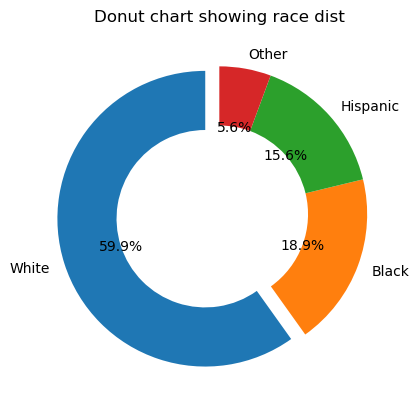

In [221]:
#62 Display a donut chart of race and explode the wedge with the maximum patients
#find the total count for each race
total_count=df_donor_details['race'].value_counts()
max_race=total_count.idxmax()
#now create explode array
explode=[0.1 if race ==max_race else 0 for race in total_count.index]

fig, ax=plt.subplots() 
wedges, texts, autotexts = ax.pie(
    total_count, 
    labels=total_count.index,
    autopct='%1.1f%%',
    explode=explode,
    startangle=90,
    wedgeprops=dict(width=0.4)
)
plt.title('Donut chart showing race dist')
plt.show()

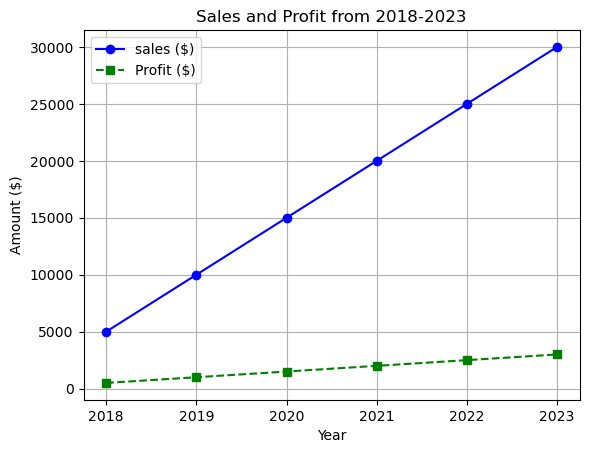

In [219]:
#63 Plot a graph multiplotting on the same canvas (take any set of x and y values)
years=[2018,2019,2020,2021,2022,2023]
sales=[5000,10000,15000,20000,25000,30000]
profit=[500,1000,1500,2000,2500,3000]

plt.plot(years,sales,label='sales ($)', color='blue', marker='o', linestyle='-')
plt.plot(years,profit,label='Profit ($)', color='green', marker='s', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Amount ($)')
plt.title('Sales and Profit from 2018-2023')
plt.legend()
plt.grid(True)
plt.show()




In [105]:
#64) Replace all null values in 'Procured_year' to 1900
#created a new dataframe and did not make the change in the original one which is why inplace = true not used
replace_py=df_referral_details.fillna(1900)
print(replace_py)

           PatientID  Approached Relatives  Authorized By Family  \
0       OPO1_P320866                     0                     0   
1       OPO1_P549364                     0                     0   
2       OPO1_P536997                     1                     0   
3       OPO1_P463285                     0                     0   
4       OPO1_P284978                     0                     0   
...              ...                   ...                   ...   
133096  OPO6_P384794                     0                     0   
133097  OPO6_P902138                     0                     0   
133098    OPO6_P5461                     0                     0   
133099  OPO6_P942291                     0                     0   
133100  OPO6_P210235                     0                     0   

        Cross_Clamped  transplanted  Tissue_Referral  Eye_Referral  \
0                   0             0                1             1   
1                   0             0        